# Probability & Statistics: III

## Central Limit Theorem <a class="anchor" id="one"></a>

**Central Limit Theorem**:

> For an arbitrary distribution, $h(x)$, with a well-defined mean, $\mu$, and standard deviation, $\sigma$ (i.e. tails should fall off faster than $1/x^2$) the mean of $N$ values \{$x_i$\} drawn from the distribution will follow a Gaussian Distribution with $\mathcal{N}(\mu,\sigma/\sqrt{N})$. 

(A Cauchy distribution is one example where this fails.)

This theorem is the foudation for the performing repeat measurements in order to improve the accuracy of one's experiment. No matter what distribution you start off with (provided it has a well defined mean and standard deviation) or the measurement process itself, repeated batches of $N$ draws will follow a Gaussian centered around the mean.  

## Bivariate and Multivariate pdfs <a class="anchor" id="two"></a>

Let's cosider $h(x,y)$ where $$\int_{-\infty}^{\infty}dx\int_{-\infty}^{\infty}h(x,y)dy = 1.$$  $h(x,y)$ is telling us the probability that $x$ is between $x$ and $dx$ and *also* that $y$ is between $y$ and $dy$.

Then we have the following definitions:

$$\mu_x = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}x h(x,y) dx dy$$

$$\mu_y = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}y h(x,y) dx dy$$

$$\sigma^2_x = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}(x-\mu_x)^2 h(x,y) dx dy$$

$$\sigma^2_y = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}(y-\mu_y)^2 h(x,y) dx dy$$


$$\sigma_{xy} = Cov(x,y) = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}(x-\mu_x) (y-\mu_y) h(x,y) dx dy$$

If $x$ and $y$ are uncorrelated, then we can treat the system as two independent 1-D distributions.  This means that choosing a range on one variable has no effect on the distribution of the other.

We can write a 2-D Gaussian pdf as
$$p(x,y|\mu_x,\mu_y,\sigma_x,\sigma_y,\sigma_{xy}) = \frac{1}{2\pi \sigma_x \sigma_y \sqrt{1-\rho^2}} \exp\left(\frac{-z^2}{2(1-\rho^2)}\right),$$

where $$z^2 = \frac{(x-\mu_x)^2}{\sigma_x^2} + \frac{(y-\mu_y)^2}{\sigma_y^2} - 2\rho\frac{(x-\mu_x)(y-\mu_y)}{\sigma_x\sigma_y},$$

with $$\rho = \frac{\sigma_{xy}}{\sigma_x\sigma_y}$$
as the **(dimensionless) correlation coefficient**.

If $x$ and $y$ are perfectly correlated then $\rho=\pm1$ and if they are uncorrelated, then $\rho=0$.

**The pdf is now not a histogram, but rather a series of contours in the $x-y$ plane.**   

These are centered at $(x=\mu_x, y=\mu_y)$ and are tilted at angle $\alpha$, which is given by
$$\tan(2 \alpha) = 2\rho\frac{\sigma_x\sigma_y}{\sigma_x^2-\sigma_y^2} = 2\frac{\sigma_{xy}}{\sigma_x^2-\sigma_y^2}.$$

For example (Ivezic, Figure 3.22):
![Ivezic, Figure 3.22](http://www.astroml.org/_images/fig_bivariate_gaussian_1.png)

We can define new coordinate axes that are aligned with the minimum and maximum widths of the distribution. (Or in different terminology, the semi-minor and semi-major axes of the ellipse). These are called the **principal axes** and are given by

$$P_1 = (x-\mu_x)\cos\alpha + (y-\mu_y)\sin\alpha,$$

and

$$P_2 = -(x-\mu_x)\sin\alpha + (y-\mu_y)\cos\alpha.$$

The widths in this (rotated) coordinate system are

$$\sigma^2_{1,2} = \frac{\sigma_x^2+\sigma_y^2}{2}\pm\sqrt{\left(\frac{\sigma_x^2-\sigma_y^2}{2}\right)^2 + \sigma^2_{xy}}.$$

Note that **the correlation vanishes in this coordinate system (by definition)** and the bivariate Gaussian is just a product of two univariate Gaussians.  

This concept will be crucial for understanding ***Principal Component Analysis*** (see later on in this course), where PCA extends this idea to even more dimensions.

In the univariate case we used $\overline{x}$ and $s$ to *estimate* $\mu$ and $\sigma$.  In the bivariate case we estimate 5 parameters: $(\overline{x},\overline{y},s_x,s_y,s_{xy})$.  

As with the univariate case, it is important to realize that **outliers can bias these estimates and that it may be more appropriate to use the median rather than the mean as a more robust estimator for $\mu_x$ and $\mu_y$**.  

Similarly we want robust estimators for the other parameters of the fit.  We won't go into that in detail right now, but see Ivezic, Figure 3.23 for an example:

![Ivezic, Figure 3.23](http://www.astroml.org/_images/fig_robust_pca_1.png)

The non-robust estimates (***dashed lines***) give biased sigma ellipses due to the outliers. The robust estimates (***solid lines***) do much better.

We can generalize the way we describe **Gaussian distributions in multiple dimensions**, $M$, through the elegance of linear algebra. Instead of writing everything in terms of separate coordinates, we can bundle everything together in an $M$-dimensional coordinate vector $\vec{x}$, mean vector $\vec{\mu}$, and covariance matrix $\mathbf{C} = E([\vec{x}-\vec{\mu}][\vec{x}-\vec{\mu}]^T)$.

$$p(\vec{x}|\vec{\mu},\mathbf{C}) = \frac{1}{\sqrt{\mathrm{det}(2\pi\mathbf{C})}} \exp\left[-\frac{1}{2}(\vec{x}-\vec{\mu})^T \mathbf{C}^{-1} (\vec{x}-\vec{\mu}) \right] $$

where 

$$ C_{kj} = \int_{-\infty}^\infty (x^k-\mu^k)(x^j-\mu^j)p(\vec{x}|\vec{\mu},\mathbf{C})\,d^M x $$

and 

$$ (\vec{x}-\vec{\mu})^T \mathbf{C}^{-1} (\vec{x}-\vec{\mu}) = \sum_{k=1}^M \sum_{j=1}^M [\mathbf{C}^{-1}]_{kj}(x^k-\mu^k)(x^j-\mu^j) $$

### Gaussian confidence levels in 2 dimensions

In two dimensions, a Gaussian density can be described by

$$ \mathrm{pdf}(r) = \frac{1}{2\pi s^2}\exp\left[-\frac{1}{2}\left(\frac{r}{s}\right)^2\right] $$

with the cdf (using polar coordinates and implicitly integrating out the angle)

$$ \mathrm{cdf}(x) = 1 - \exp(-(x/s)^2/2) $$

This means that within "1-sigma", the Gaussian contains 1-exp(-0.5) $\sim 0.393$ or $39.3\%$ of the volume. Therefore in `corner`, the relevant 1-sigma levels for a 2D histogram of samples is 39% not 68%. 

If you are using `corner` and want the usual 68% of the "sample mass" definition of sigma, use the `levels` keyword argument when you call `corner.corner`.

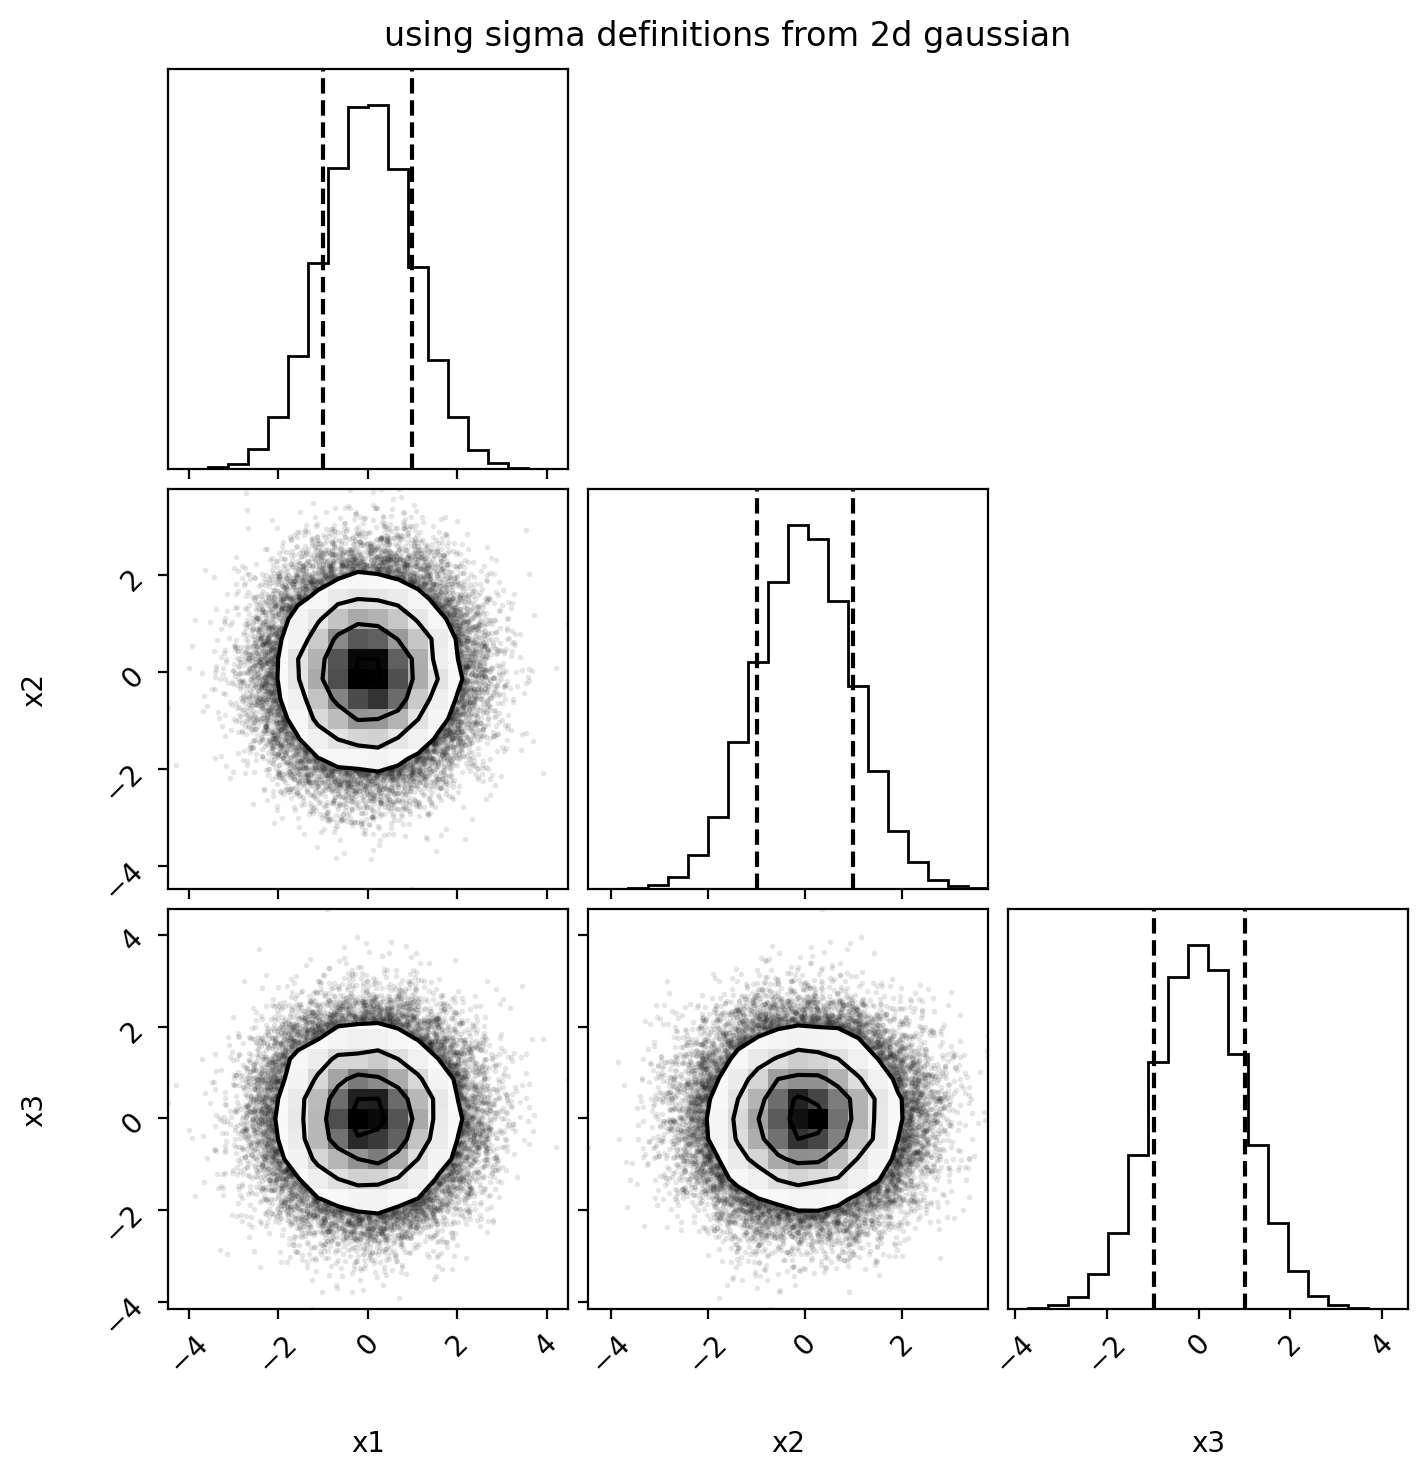

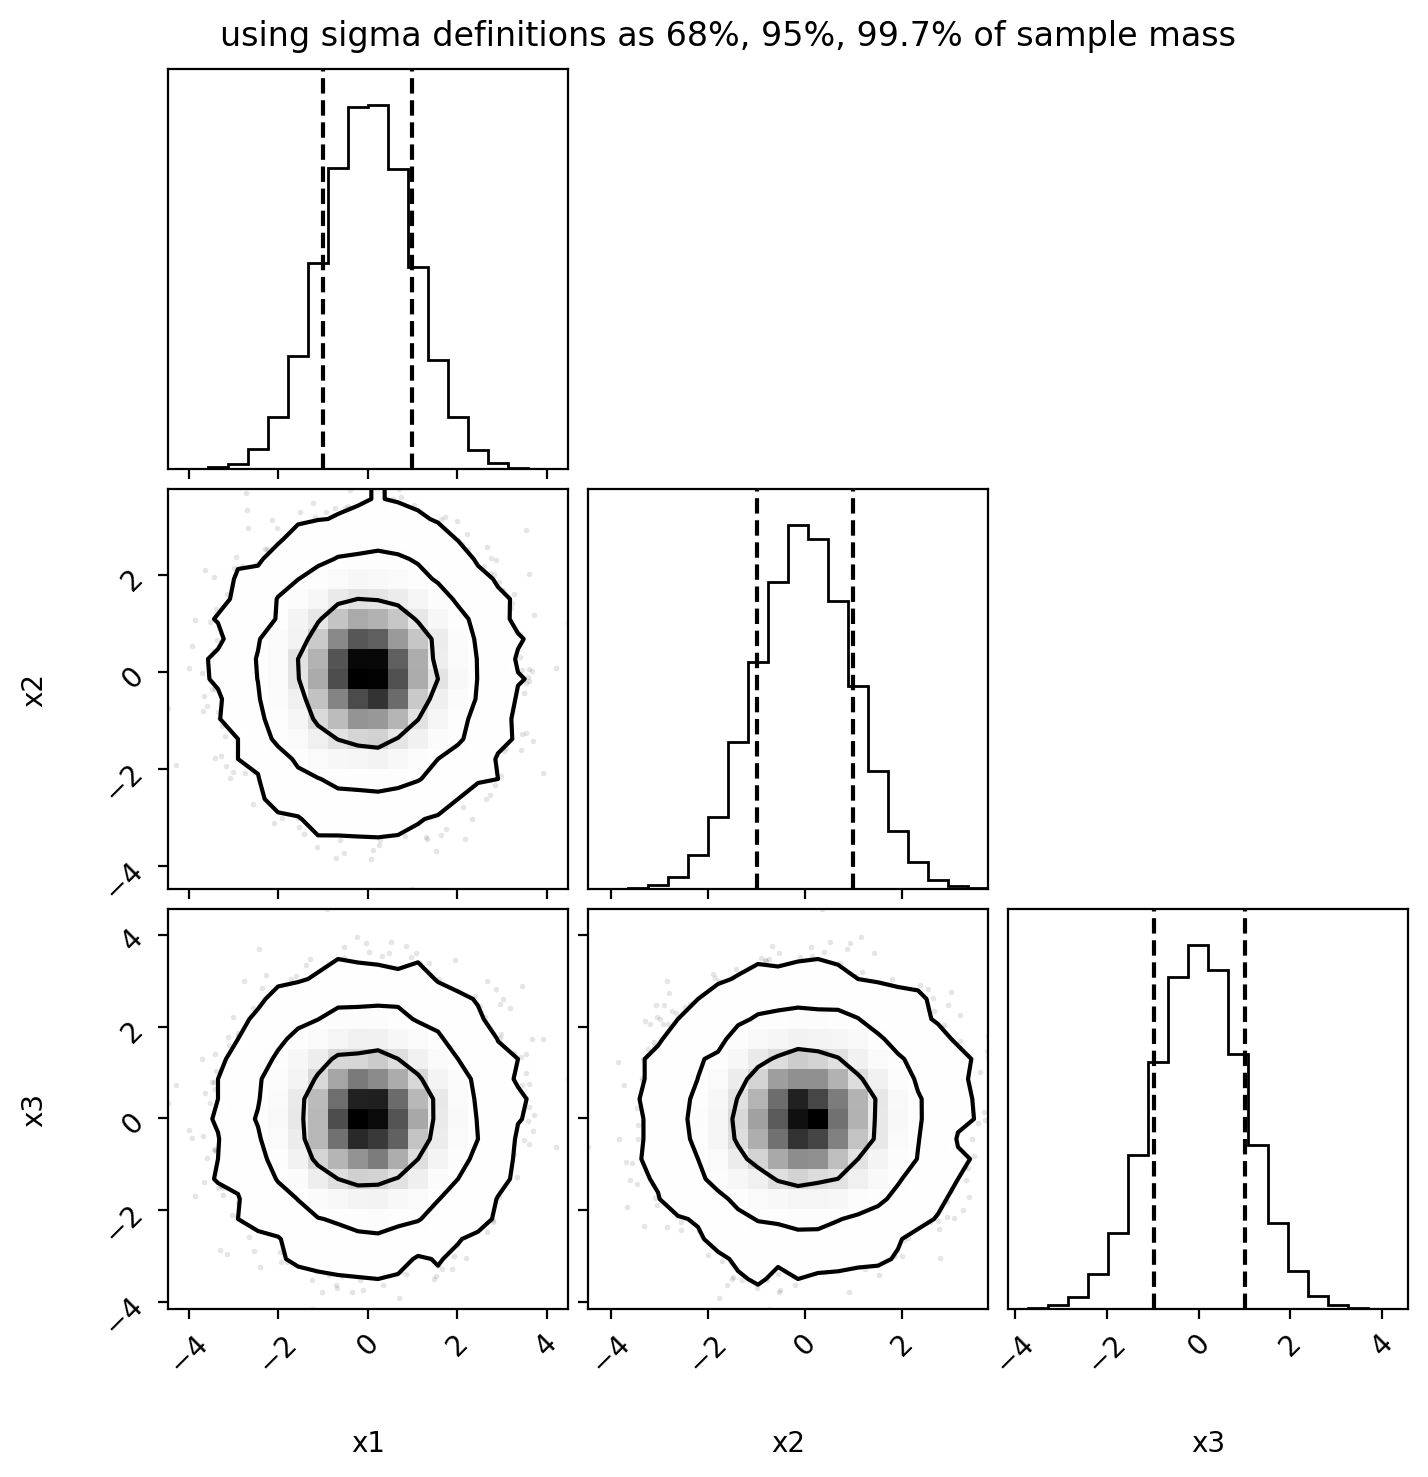

In [14]:
import corner

# Generate some fake data from a Gaussian
np.random.seed(42)
x = np.random.randn(50000, 3)

# formally correct sigma definition
fig = corner.corner(x, quantiles=(0.16, 0.84), labels=['x1','x2','x3'])
fig.suptitle("using sigma definitions from 2d gaussian");

# standard sample mass definition
fig = corner.corner(x, quantiles=(0.16, 0.84), levels=(0.68,0.95,0.997), labels=['x1','x2','x3'])
fig.suptitle("using sigma definitions as 68%, 95%, 99.7% of sample mass");

## Correlation coefficients <a class="anchor" id="three"></a>

We'd like to be able to quantify how well two samples of data are correlated with one another 

BTW: always remember that **correlation does not imply causation**. 

![](https://miro.medium.com/v2/resize:fit:1200/1*8j7U89RK1SgopIGET0mSFA.png)

### Pearson's coefficient

Given two length-$N$ samples of data $\{x_i\}$ and $\{y_i\}$, Pearson's correlation coefficient is defined as

$$ r = \frac{\sum_{i=1}^N (x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\sum_{i=1}^N (x_i-\bar{x})^2}\sqrt{\sum_{i=1}^N (y_i-\bar{y})^2}} $$

where $-1\leq r\leq 1$, and $r=0$ for uncorrelated variables.

If the pairs $(x_i,y_i)$ are drawn from uncorrelated univariate Gaussian distributions, then the distribution of $r$ follows a Student's $t$ distribution with $k=N-2$ degrees of freedom and $t = r\sqrt{(N-2)/(1-r^2)}$.

With this known "null hypothesis" distribution, a measured $r$ can be interpreted in terms of the significance with which we can reject the variables being correlated, e.g., if $N=10$ then the probability that a value of $r\geq 0.72$ arises just by chance noise fluctuations is $1\%$. 

There are two big problems with Pearson's coefficient though:
- It does not incorporate measurement uncertainties on the data.
- It is highly susceptible to outliers.

### Spearman's coefficient

Similar definition to Pearson's, with sample values replaced by their cumulative ranks. As we've seen, cumulative statistics based on rank are more robust estimators than ones that use the actual sample values. The samples in each dataset are ranked from $1,\ldots,N$ in ascending order, with the largest value given the rank $N$. 

$$ r_S = \frac{\sum_{i=1}^N (R^x_i-\bar{R^x})(R^y_i-\bar{R^y})}{\sqrt{\sum_{i=1}^N (R^x_i-\bar{R^x})^2}\sqrt{\sum_{i=1}^N (R^y_i-\bar{R^y})^2}}. $$

The distribution of $r_S$ is the same as for Pearson's, except in the definition of the test statsitic $t$, $r$ is replaced by $r_S$.

### Kendall's coefficient

Kendall's coefficient uses the sample ranks, but does not take rank differences like in Spearman's coefficient. Instead, we compare the relative number of *concordant* and *discordant* pairs. 

**Concordant pairs** are where the differences in values between a pair of samples $j$ and $k$ have the same sign in $x$ and $y$, i.e., $(x_j-x_k)(y_j-y_k)>0$.

**Discordant pairs** are where the differences in values between a pair of samples $j$ and $k$ have the different signs in $x$ and $y$, i.e., $(x_j-x_k)(y_j-y_k)<0$.

*For perfectly correlated data, all $N(N-1)/2$ sample pairs will be concordant. For perfectly anti-correlated data, all pairs will be discordant.* 

Kendall's $\tau$ is then computed as

$$ \tau = 2\frac{N_c-N_d}{N(N-1)}.$$

In the following example that reproduces *Ivezic Fig. 3.24*, samples of $x$ and $y$ from a bivariate normal distribution with/without outlier contamination are assessed for correlation using each of the above. It is clear that Pearson's suffers considerably from outliers, while the rank-based coefficients are more resilient. 

**Hang on!** By running again the code, see how Spearman's test provides a biases estimator. If you look at the code, I'm computing a distribution of estimators out of a single dataset. How on Earth is that possible?! It's called "bootstrap" and it's a very powerful tecnique. We'll see it in a bit.

# Sampling from arbitrary distributions 

Numerical simulations of the measurment process are often the only practical way to assess the complicated influences of selection effects, biases, and other processing stages of data taking. Such approaches are often called **Monte Carlo simulations**, producing **Monte Carlo or mock samples**. It is often highly beneficial to resample from arbitrary distributions in order to simulate further measurements.

Imagine you've got an arbitrary distribution $h(x)$ in analytic or histogram form (or alternatively just samples from it). How do you make more samples if it's not one of the standard distributions in `numpy` or `scipy`? We'll discuss the 1D case here in two ways. **Rejection sampling** (less preferred) and **Inverse transform sampling** (highly preferred and easy). But in high dimensions rejection sampling might be the only way forward.

Also, rejection sampling is somewhat easier to implement and could be a good choice for quick-and-dirty explorations. 



## Rejection sampling

The process for sampling from an arbitrary distribution with rejection is:

1) Decide on a straightforward *proposal distribution* $q(x)$ to propose new samples. It should be wide enough to capture the tails of $h(x)$. We'll use a uniform distribution here.

2) Generate a random sample from $q(x)$, $x_i$.

3) Now generate a random sample, $u$, from a uniform distribution in the range $[0,\mathrm{max}(h(x))]$, where the upper bound should be as large or larger than the maximum density of $h(x)$. (This could be worked out analytically or by histograming the data.)

4) If $u\leq h(x_i)$ accept the point, or else reject it and try again from step 2.


This is shown pictorally here (image reproduced by [Robert Collins class CSE586 "Computer Vision II" at PSU](http://www.cse.psu.edu/~rtc12/CSE586/))

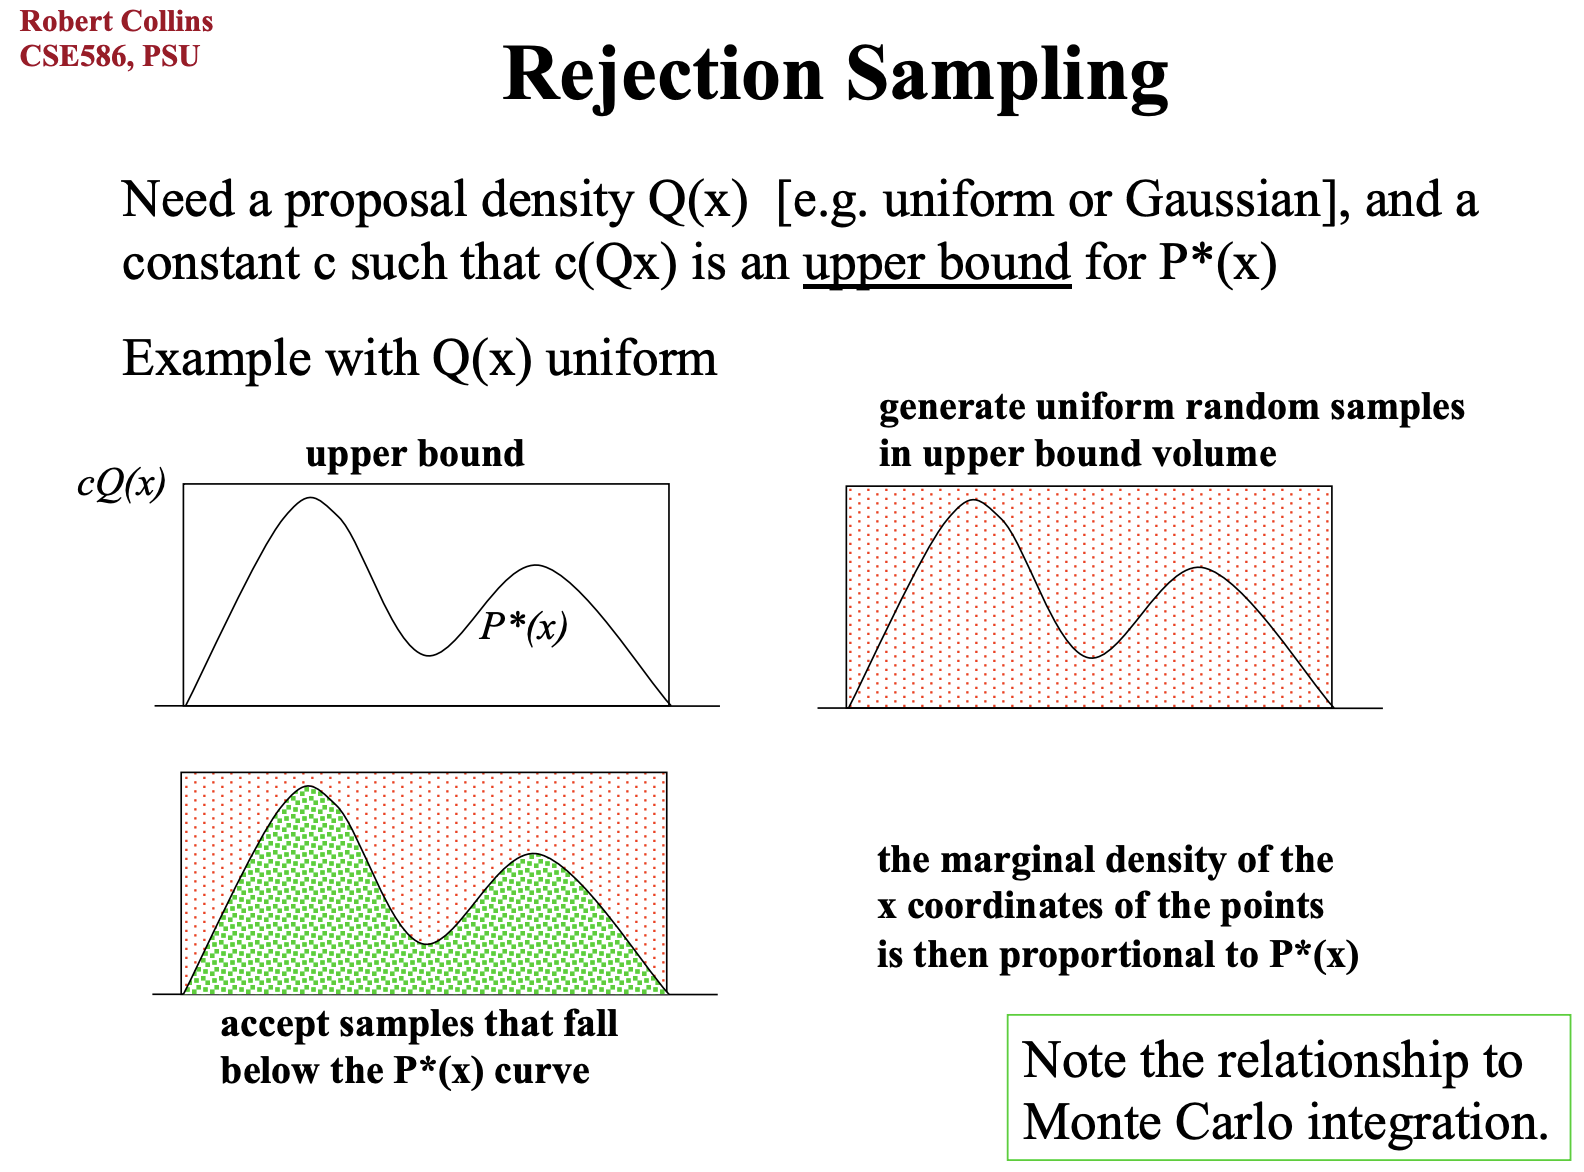

Let's try this for a simple case. Sample from $$p(x)\propto x+sin(x)$$ between 0 and 10

## Inverse transform sampling

Rejection sampling works, but wouldn't it be awesome if we didn't have to discard *any* points during our sampling? This is the power and simplicity of **inverse transform sampling**. The process is exceedingly simple. 

1) To sample from an arbitrary $h(x)$, you will also need the cdf $H(x)$ and its inverse, the quantile function $H^{-1}(x)$. If $h(x)$ is difficult to integrate, or $H(x)$ is difficult to invert to get the quantile function, then you could use numerical techniques to interpolate or produce lookup tables.

2) Generate a random sample $u$ from a uniform random distribution $[0,1]$. 

3) Using the quantile function $H^{-1}(x)$, find the value of $x$ below which a fraction $u$ of the distribution is contained. 

4) The $x$ value you get is a random sample from $h(x)$. Easy, right?


Let's try this for a simple case. Sample from $$p(x)\propto x$$ between 0 and 10

First, the normalization is important here. 

$$p(x)= \frac{1}{50} x$$

such that $\int p(x) dx=1$ over its domain. 

The cdf is 

First I need to compute the cdf

$$ P(x)= \int_0^x  \frac{1}{50} x' dx' = \frac{x^2}{100} $$

I can now invert this

$$x = \sqrt{100 P}$$

If I can't do it analitically, I can do it numerically. 

### Cloning or upsample

In the example above we have been sampling from an known function. In most application you don't have this luxury. You're only given datapoints. This called "cloning" or "upsampling", which is: I have samples from a distribution but I'm greedy and I want more. This is crucial in modern stastical application such as bootstrap and jacknife (see next lectures).